In [1]:
library(tibble)
library(tidyverse)
library(readxl)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tidyr   0.8.3       v dplyr   0.8.0.1
v readr   1.3.1       v stringr 1.4.0  
v ggplot2 3.1.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


### Exercise 1

In [2]:
data1 <- read_xlsx("scottish-lochs.xlsx", col_names = T)[-1,]
tibble1 <- as_tibble(data1)
class(tibble1)

tibble1[which(tibble1$Volume == max(tibble1$Volume)),] #max volume
tibble1[which(tibble1$Volume == min(tibble1$Volume)),] #min volume

tibble1[which(tibble1$Area == max(tibble1$Area)),] #max area
tibble1[which(tibble1$Area == min(tibble1$Area)),] #min area



tibble1 <- arrange(tibble1, desc(Area))
head(tibble1,2) #two largest area lochs

tibble_new = mutate(tibble1, area_tot = cumsum(Area))
total_water = max(tibble_new$area_tot) #total area covered by lochs in km2

#Scotland in km2 = 80,240 km2
scotland_area = 80240
water_cover = total_water/scotland_area*100
paste("Percentage Land Cover by Lochs:", round(water_cover,3),"%")

[1] "tbl_df"     "tbl"        "data.frame"

Loch,Volume,Area,Length,Max. depth,Mean depth
Loch Ness,7.45,56,39,230,132


Loch,Volume,Area,Length,Max. depth,Mean depth
Loch Shin,0.35,22.5,27.8,49,15.5


Loch,Volume,Area,Length,Max. depth,Mean depth
Loch Lomond,2.6,71,36,190,37


Loch,Volume,Area,Length,Max. depth,Mean depth
Loch Katrine,0.77,12.4,12.9,151,43.4


Loch,Volume,Area,Length,Max. depth,Mean depth
Loch Lomond,2.6,71,36,190,37
Loch Ness,7.45,56,39,230,132


[1] "Percentage Land Cover by Lochs: 0.464 %"

### Exercise 2

In [3]:
data <- read.table("crude-oil-prices.csv",header=T,sep=",", skip=1)
tibble2 <- as_tibble(data)
class(data)
class(tibble2)


[1] "data.frame"

[1] "tbl_df"     "tbl"        "data.frame"

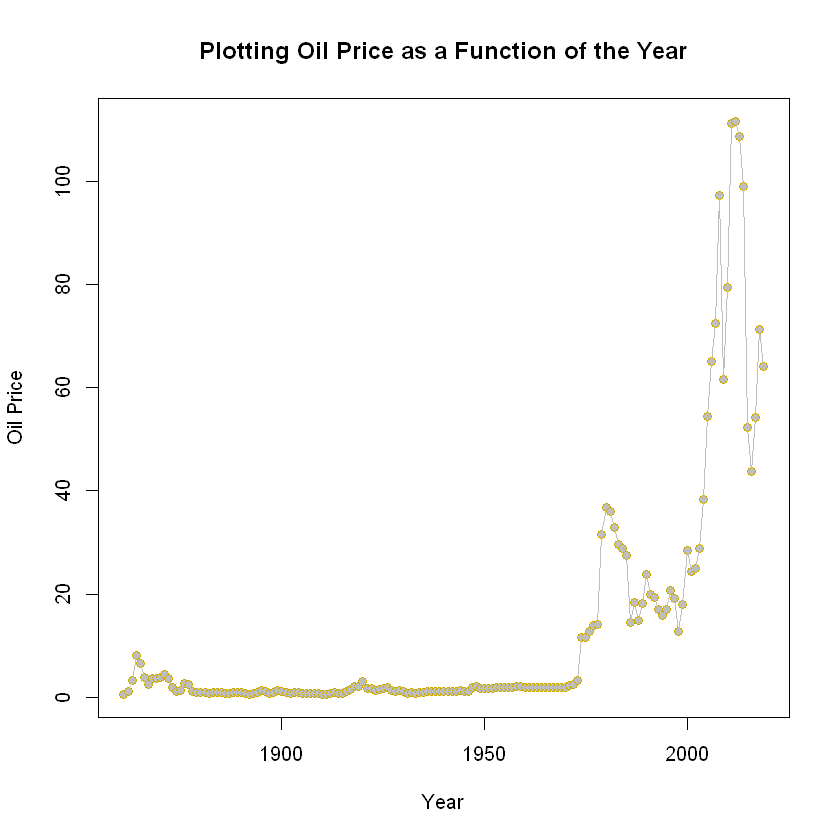

In [4]:
plot(tibble2$Year, tibble2$OilPrice, col="gold3", xlab="Year", ylab="Oil Price", pch=21, bg=8, main="Plotting Oil Price as a Function of the Year")
lines(tibble2$Year, tibble2$OilPrice, col="grey")

In [5]:
tibble2[which(tibble2$OilPrice == max(tibble2$OilPrice), arr.ind = T),]

Entity,Code,Year,OilPrice
World,OWID_WRL,2012,111.6697


In [6]:
#finite difference formula
data_new = mutate(tibble2, diff = OilPrice - lag(OilPrice))

class(data_new)


[1] "tbl_df"     "tbl"        "data.frame"

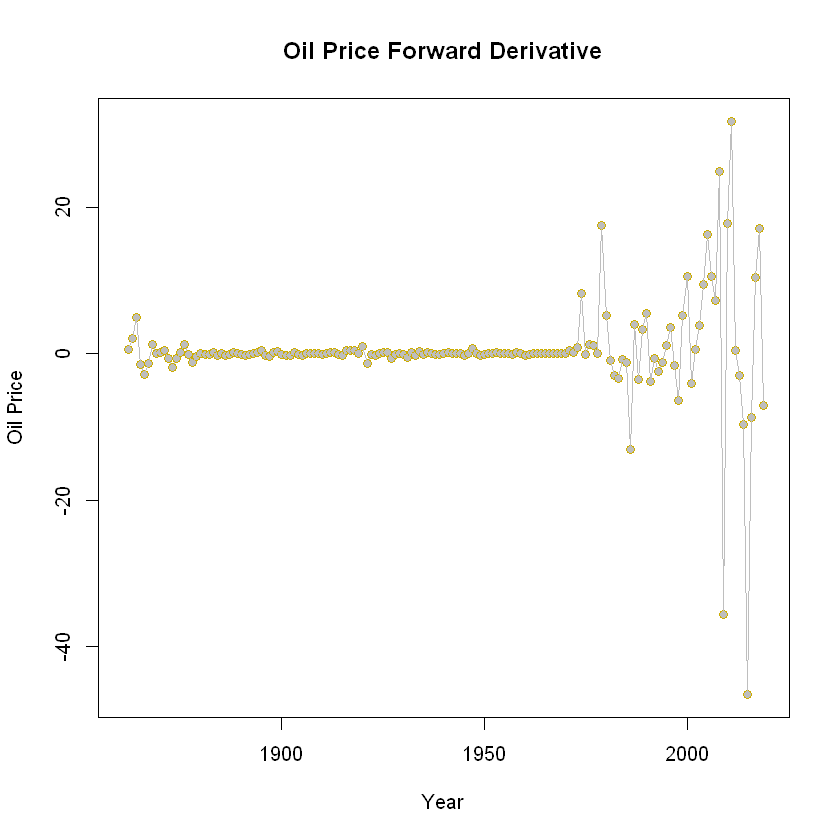

In [7]:
plot(data_new$Year, data_new$diff, col="gold3", xlab="Year", ylab="Oil Price", pch=21, bg=8, main="Oil Price Forward Derivative")
lines(data_new$Year, data_new$diff, col="grey")

### Exercise 3

In [8]:
data3 <- read.table("coal-production-by-country.csv",header=T,sep=",", skip=0)
tibble3 <- tibble::as_tibble(data.frame(data3))
class(tibble3)
head(tibble3)

[1] "tbl_df"     "tbl"        "data.frame"

Entity,Code,Year,Coal.production..TWh.
Afghanistan,AFG,1900,0
Afghanistan,AFG,1901,0
Afghanistan,AFG,1902,0
Afghanistan,AFG,1903,0
Afghanistan,AFG,1904,0
Afghanistan,AFG,1905,0


In [9]:
names(tibble3)
?unique
paste("Number of countries:", length(unique(tibble3$Entity)))

[1] "Entity"                "Code"                  "Year"                 
[4] "Coal.production..TWh."

[1] "Number of countries: 200"

[1] "Entity" "count"

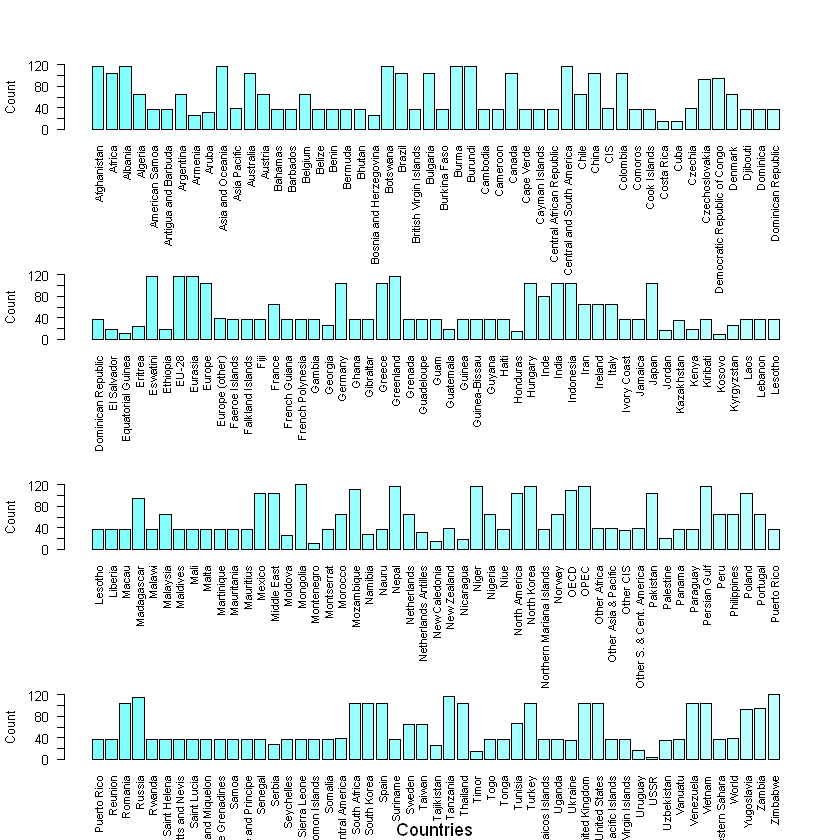

In [44]:
#?group_by
tibble_new <- tibble3 %>% group_by(Entity) %>% summarise(count = n())
names(tibble_new)
plot <- tibble_new$count
names(plot) <- tibble_new$Entity

par(mfrow = c(4,1)) #200 countries on one graph wasn't legible so I split it up
barplot(plot[0:50], beside=T, col=cm.colors(200), ylab = "Count", las=2, cex.names=.85, ylim = c(0,120))
barplot(plot[50:100], beside=T, col=cm.colors(200), ylab = "Count", las=2, cex.names=.85, ylim = c(0,120))
barplot(plot[100:150], beside=T, col=cm.colors(200),ylab = "Count", las=2, cex.names=.85, ylim = c(0,120))
barplot(plot[150:200], beside=T, col=cm.colors(200), xlab = "", ylab = "Count", las=2, cex.names=.85, ylim = c(0,120))
mtext("Countries", side=1, line=4, cex = .9)



In [11]:
?filter
tibble_up <- tibble3 %>% filter(Year >= 1969)
names(tibble_up)
#tibble3[which(tibble3$Entity == "China", tibble3$Year >= 1950),]
tibble3 %>% filter(Year > 1959, Entity == "China")
tibble_up[which(tibble_up$Entity == "China"),]

[1] "Entity"                "Code"                  "Year"                 
[4] "Coal.production..TWh."

Entity,Code,Year,Coal.production..TWh.
China,CHN,1960,2441.325
China,CHN,1961,1453.170
China,CHN,1962,1453.170
China,CHN,1963,1453.170
China,CHN,1964,1685.677
China,CHN,1981,3614.607
China,CHN,1982,3874.538
China,CHN,1983,4154.821
China,CHN,1984,4589.202
China,CHN,1985,5072.429


Entity,Code,Year,Coal.production..TWh.
China,CHN,1981,3614.607
China,CHN,1982,3874.538
China,CHN,1983,4154.821
China,CHN,1984,4589.202
China,CHN,1985,5072.429
China,CHN,1986,5198.614
China,CHN,1987,5396.906
China,CHN,1988,5698.123
China,CHN,1989,6130.178
China,CHN,1990,6279.525


In [12]:
top_countries <- tibble_up %>% group_by(Entity) %>% summarise(TotCoal = sum(Coal.production..TWh.))
top5_countries <- arrange(top_countries, desc(TotCoal)) %>% head(top_countries, n=14)
top5_countries #data includes blocs/continents so have to remove them 
top5_countries <- top5_countries[-c(1,2,3,5,6,8,9,10,12),]
top5_countries

Entity,TotCoal
World,1260113.24
Asia Pacific,690240.47
Asia and Oceania,689384.76
China,459564.65
OECD,447778.65
North America,244443.42
United States,226068.84
Eurasia,165153.74
EU-28,155412.94
Europe,149902.11


Entity,TotCoal
China,459564.65
United States,226068.84
Russia,105481.75
Australia,83077.07
India,77043.45


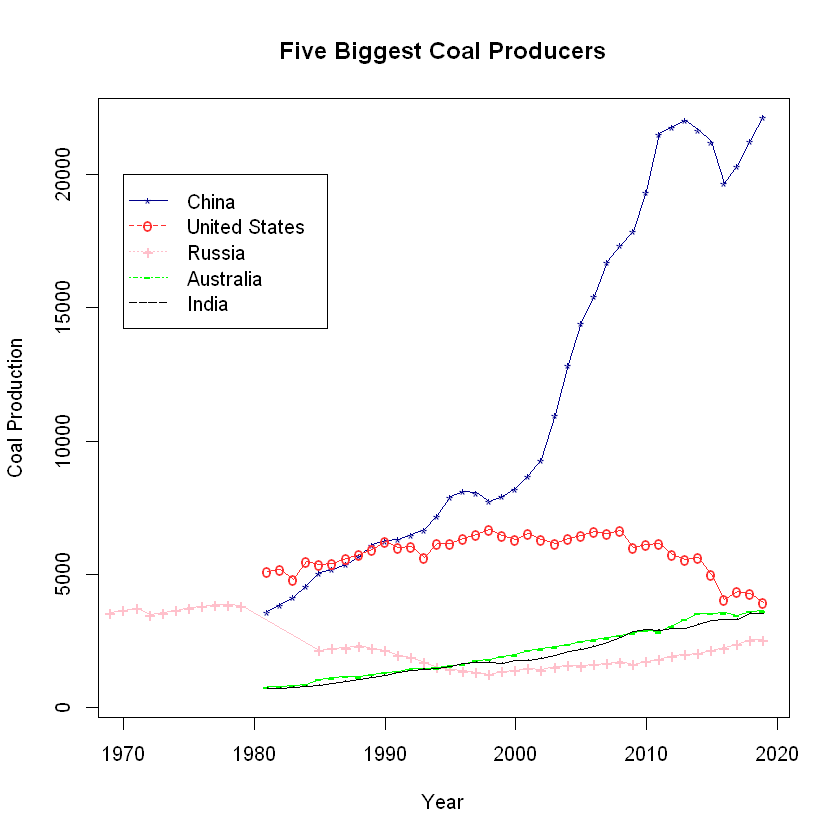

In [13]:
China_data <- tibble_up[which(tibble_up$Entity == "China"),]
US_data <- tibble_up[which(tibble_up$Entity == "United States"),]
Russia_data <- tibble_up[which(tibble_up$Entity == "Russia"),]
Oz_data <- tibble_up[which(tibble_up$Entity == "Australia"),]
India_data <- tibble_up[which(tibble_up$Entity == "India"),]

x <- China_data$Year

plot(x, China_data$Coal.production..TWh., xlim = c(1970, 2019), ylim = c(500,22000), col="darkblue",pch="*",lty=1,
        xlab="Year",ylab="Coal Production",
        main="Five Biggest Coal Producers")
lines(x, China_data$Coal.production..TWh.,col="darkblue")

points(US_data$Year, US_data$Coal.production..TWh., col="firebrick1",pch="o",lty=2)
lines(US_data$Year, US_data$Coal.production..TWh.,col="firebrick1")

points(Russia_data$Year, Russia_data$Coal.production..TWh., col="pink",pch="+",lty=3)
lines(Russia_data$Year, Russia_data$Coal.production..TWh.,col="pink")

points(Oz_data$Year, Oz_data$Coal.production..TWh., col="green",pch="-",lty=4)
lines(Oz_data$Year, Oz_data$Coal.production..TWh.,col="green")

points(India_data$Year, India_data$Coal.production..TWh., col="black",pch=".",lty=5)
lines(India_data$Year, India_data$Coal.production..TWh.,col="black")

legend(1970, 20000, legend=c("China","United States","Russia","Australia","India"),
       col=c("darkblue","firebrick1","pink","green","black"),
       pch=c("*","o","+","-","."),
       lty=c(1,2,3,4,5)
      )

In [14]:
#cumulative sum of World's coal production 
world_prod <- filter(tibble_up, Entity == "World")
#add column with cumulative values
world_tot = mutate(world_prod, cumsum = cumsum(Coal.production..TWh.))
head(world_tot)

Entity,Code,Year,Coal.production..TWh.,cumsum
World,OWID_WRL,1981,21461.50,21461.50
World,OWID_WRL,1982,22216.95,43678.46
World,OWID_WRL,1983,22145.52,65823.97
World,OWID_WRL,1984,23113.19,88937.16
World,OWID_WRL,1985,24282.27,113219.43
World,OWID_WRL,1986,24857.58,138077.01


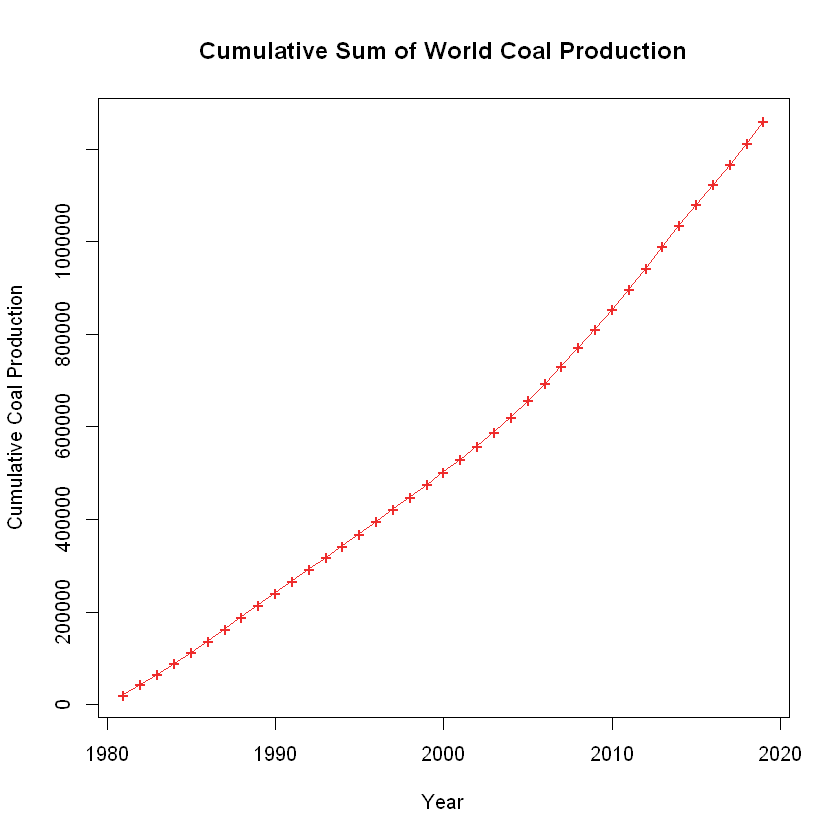

In [15]:
plot(world_tot$Year, world_tot$cumsum, col="firebrick2", pch="+",xlab="Year",ylab="Cumulative Coal Production",main="Cumulative Sum of World Coal Production")
lines(world_tot$Year, world_tot$cumsum, col="firebrick2")

### Question 4

In [16]:
data4 <- read.table("vaccinations-by-manufacturer.csv",header=T,sep=",", skip=0)
tibble4 <- tibble::as_tibble(data.frame(data4))
italy_vacc <- filter(tibble4, location == "Italy")
class(italy_vacc)
names(italy_vacc)
unique(italy_vacc$vaccine) #to find the names of the different vaccines

[1] "tbl_df"     "tbl"        "data.frame"

[1] "location"           "date"               "vaccine"           
[4] "total_vaccinations"

[1] Pfizer/BioNTech    Moderna            Oxford/AstraZeneca
5 Levels: Johnson&Johnson Moderna Oxford/AstraZeneca ... Sinovac

In [17]:
pfizer <- filter(italy_vacc, vaccine == "Pfizer/BioNTech")
oxford <- filter(italy_vacc, vaccine == "Oxford/AstraZeneca")
moderna <- filter(italy_vacc, vaccine == "Moderna")

# johnson2 <- filter(italy_vacc, vaccine == "Johnson&Johnson")
# sinovac2 <- filter(italy_vacc, vaccine == "Sinovac")

# sinovac2

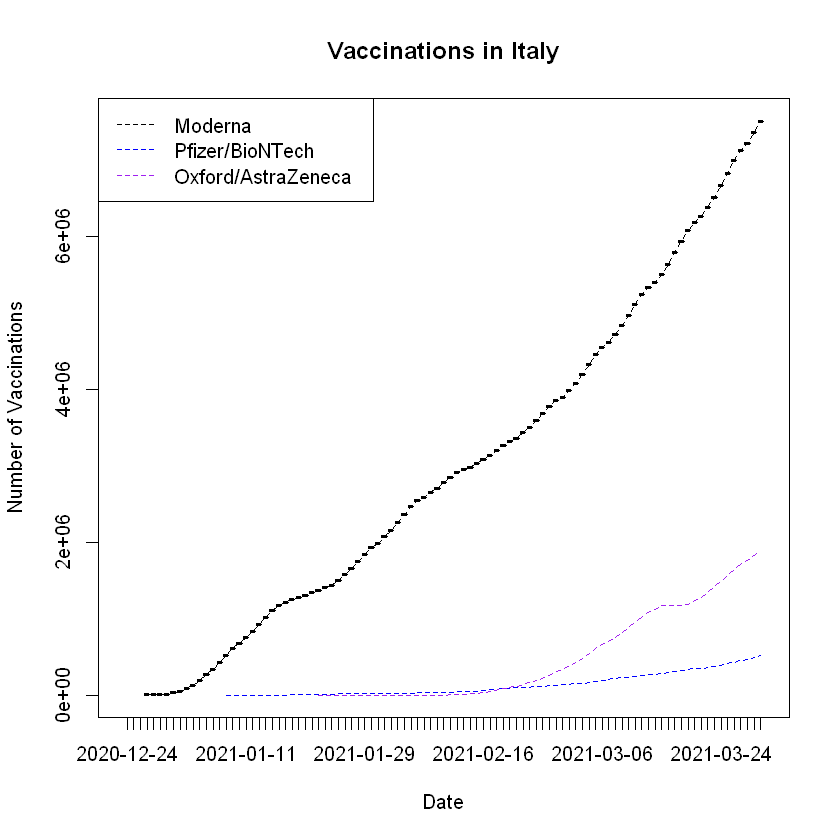

In [18]:
plot(pfizer$date, pfizer$total_vaccinations, col=("black"), pch=".", main="Vaccinations in Italy", xlab="Date", ylab="Number of Vaccinations") 
lines(pfizer$date, pfizer$total_vaccinations, col=("black"), lty=2)

points(moderna$date, moderna$total_vaccinations, type="l", col=("blue"), lty=2)

points(oxford$date, oxford$total_vaccinations, type="l", col=("purple"),lty=2)


legend("topleft", legend=c('Moderna', 'Pfizer/BioNTech', 'Oxford/AstraZeneca'),
       col=c("black","blue","purple"),lty=c(2,2,2))
       #pch=c("o","*","+","-","."),


In [19]:
germany_vacc <- filter(tibble4, location == "Germany")
unique(germany_vacc$vaccine) #to find the names of the different vaccines
pfizer2 <- filter(germany_vacc, vaccine == "Pfizer/BioNTech")
oxford2 <- filter(germany_vacc, vaccine == "Oxford/AstraZeneca")
moderna2 <- filter(germany_vacc, vaccine == "Moderna")

# johnson2 <- filter(germany_vacc, vaccine == "Johnson&Johnson")
# sinovac2 <- filter(germany_vacc, vaccine == "Sinovac")


[1] Moderna            Oxford/AstraZeneca Pfizer/BioNTech   
5 Levels: Johnson&Johnson Moderna Oxford/AstraZeneca ... Sinovac

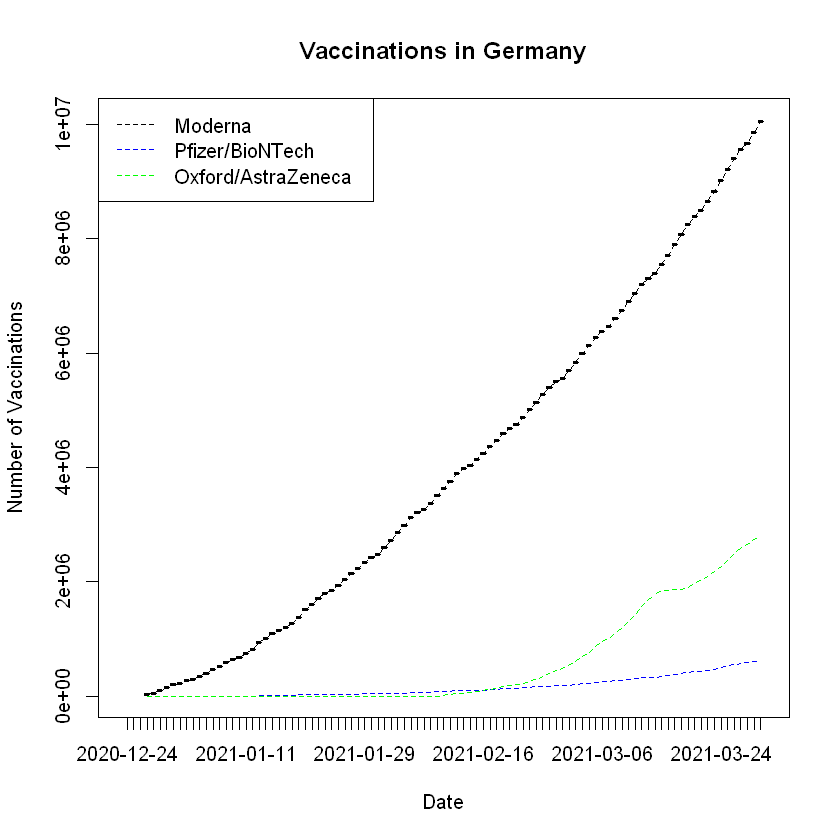

In [20]:
plot(pfizer2$date, pfizer2$total_vaccinations, col=("black"), pch=".", main="Vaccinations in Germany", xlab="Date", ylab="Number of Vaccinations") 
lines(pfizer2$date, pfizer2$total_vaccinations, col=("black"), lty=2)

points(moderna2$date, moderna2$total_vaccinations, type="l", col=("blue"), lty=2)

points(oxford2$date, oxford2$total_vaccinations, type="l", col=("green"),lty=2)


legend("topleft", legend=c('Moderna', 'Pfizer/BioNTech', 'Oxford/AstraZeneca'),
       col=c("black","blue","green"),lty=c(2,2,2))

In [21]:
US_vacc <- filter(tibble4, location == "United States")
unique(US_vacc$vaccine) #to find the names of the different vaccines
pfizer3 <- filter(US_vacc, vaccine == "Pfizer/BioNTech")
oxford3 <- filter(US_vacc, vaccine == "Oxford/AstraZeneca")
moderna3 <- filter(US_vacc, vaccine == "Moderna")
johnson3 <- filter(US_vacc, vaccine == "Johnson&Johnson")
# sinovac3 <- filter(US_vacc, vaccine == "Sinovac")

#oxford3

[1] Moderna         Pfizer/BioNTech Johnson&Johnson
5 Levels: Johnson&Johnson Moderna Oxford/AstraZeneca ... Sinovac

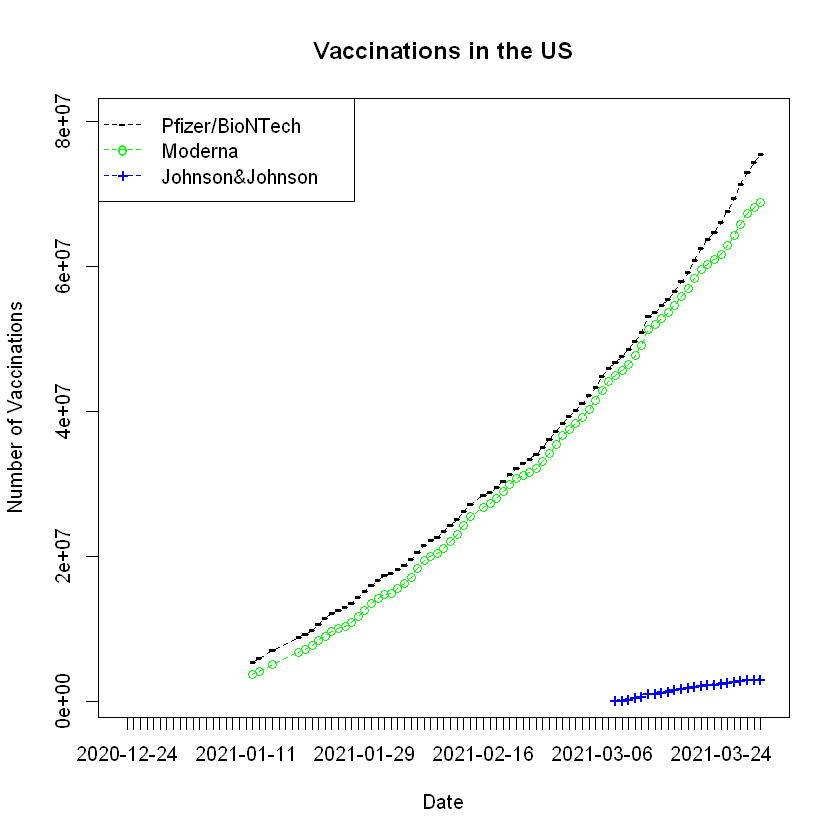

In [22]:
plot(pfizer3$date, pfizer3$total_vaccinations, col=("black"), ylim=c(1e+06, 8e+07), main="Vaccinations in the US", xlab="Date", ylab="Number of Vaccinations")
lines(pfizer3$date, pfizer3$total_vaccinations, col=("black"),lty=2)

points(moderna3$date, moderna3$total_vaccinations, col=("green"), lty=2)
lines(moderna3$date, moderna3$total_vaccinations, col=("green"), lty=2)

points(johnson3$date, johnson3$total_vaccinations, col=("blue"), pch="+", lty=2)
lines(johnson3$date, johnson3$total_vaccinations, col=("blue"), lty=2)

legend("topleft", legend=c('Pfizer/BioNTech', 'Moderna', 'Johnson&Johnson'),
       col=c("black","green","blue"),lty=c(2,2,2), pch=c("-","o","+"))

In [23]:
data4_2 <- read.table("vaccinations.csv",header=T,sep=",", skip=0)
tibble4_2 <- tibble::as_tibble(data.frame(data4_2))
names(tibble4_2)
#unique(tibble4_2$iso_code)
unique(tibble4_2$location)
#tibble4_2 %>% filter(iso_code %in% c("OWID_AFR", "OWID_ASI", "OWID_EUR", "OWID_EUN","OWID_ENG","OWID_NAM", "OWID_CYN","OWID_NIR" , "OWID_OCE","OWID_SCT", "OWID_WLS", "OWID_WRL"))


[1] "location"                            "iso_code"                           
 [3] "date"                                "total_vaccinations"                 
 [5] "people_vaccinated"                   "people_fully_vaccinated"            
 [7] "daily_vaccinations_raw"              "daily_vaccinations"                 
 [9] "total_vaccinations_per_hundred"      "people_vaccinated_per_hundred"      
[11] "people_fully_vaccinated_per_hundred" "daily_vaccinations_per_million"

[1] Afghanistan                                                                   
  [2] Africa                                                                        
  [3] Albania                                                                       
  [4] Algeria                                                                       
  [5] Andorra                                                                       
  [6] Angola                                                                        
  [7] Anguilla                                                                      
  [8] Antigua and Barbuda                                                           
  [9] Argentina                                                                     
 [10] Asia                                                                          
 [11] Australia                                                                     
 [12] Austria                                                                       
 [13] Azerbaijan                                                                    
 [14] Bahamas                                                                       
 [15] Bahrain                                                                       
 [16] Bangladesh                                                                    
 [17] Barbados                                                                      
 [18] Belarus                                                                       
 [19] Belgium                                                                       
 [20] Belize                                                                        
 [21] Bermuda                                                                       
 [22] Bhutan                                                                        
 [23] Bolivia                                                                       
 [24] Brazil                                                                        
 [25] Bulgaria                                                                      
 [26] Cambodia                                                                      
 [27] Canada                                                                        
 [28] Cape Verde                                                                    
 [29] Cayman Islands                                                                
 [30] Chile                                                                         
 [31] China                                                                         
 [32] Colombia                                                                      
 [33] Costa Rica                                                                    
 [34] Cote dIvoire,CIV,2021-03-01,0,0,,,,0,0,,\nCote dIvoire                        
 [35] Cote dIvoire,CIV,2021-03-03,,,,,412,,,,16\nCote dIvoire                       
 [36] Cote dIvoire,CIV,2021-03-05,,,,,412,,,,16\nCote dIvoire                       
 [37] Cote dIvoire,CIV,2021-03-07,,,,,415,,,,16\nCote dIvoire                       
 [38] Cote dIvoire,CIV,2021-03-09,4363,4363,,1439,564,0.02,0.02,,21\nCote dIvoire   
 [39] Cote dIvoire,CIV,2021-03-11,,,,,1300,,,,49\nCote dIvoire                      
 [40] Cote dIvoire,CIV,2021-03-13,,,,,1621,,,,61\nCote dIvoire                      
 [41] Cote dIvoire,CIV,2021-03-15,15181,15181,,244,1751,0.06,0.06,,66\nCote dIvoire 
 [42] Cote dIvoire,CIV,2021-03-17,19113,19113,,1665,1473,0.07,0.07,,56\nCote dIvoire
 [43] Cote dIvoire,CIV,2021-03-19,22443,22443,,1677,1510,0.09,0.09,,57\nCote dIvoire
 [44] Cote dIvoire,CIV,2021-03-21,24639,24639,,468,1386,0.09,0.09,,53\nCote dIvoire 
 [45] Cote dIvoire,CIV,2021-03-23,26079,26079,,1351,1233,0.1,0.1,,47\nCote dIvoire  
 [46] Cote dIvoire,CIV,2021-03-25,29535,29535,,1649,1253,0.11,0.11,,48\nCote dIvoire
 [47] Cote dIvoire,CIV,2021-03-27,33395,33395,,2291,1318,0.13,0.13,,50\nCote dIvoire
 [48] C

In [24]:
europe_vacc <- tibble4_2 %>% filter(location %in% c("Albania", "Andorra", "Austria", "Belarus","Belgium","Bulgaria", "Croatia","Cyprus" , "Czechia","Denmark", "Estonia", "Finland","France","Germany","Gibraltar","Greece","Greenland","Guernsey","Hungary","Iceland","Ireland","Isle of Man","Italy","jerset","Latvia","Liechtenstein","Lithuania","Luxembourg","Malta","Moldova","Monaco","Montenegro","Netherlands","North Macedonia","Norway","Poland","Portugal","Romania","San Marino","Serbia","Slovakia","Slovenia","Spain","Sweden","Switzerland","Turkey","Ukraine","United Kingdom"))

In [25]:
#i need to sum all the daily vaccinations per million for each country. if uk have 10 million people and 20 daily vacc per million
# then theres 200 per day. france have 5 milli people and 10 daily vac per milli so 50 per day. 
#should be 10*20+5*10 /15
names(europe_vacc) #sum all the daily vaccinations then divide by the number of millions of people in europe it should work
head(europe_vacc) #i dont understand what the difference between 'daily_vaccinations_raw' and 'daily_vaccinations' is

[1] "location"                            "iso_code"                           
 [3] "date"                                "total_vaccinations"                 
 [5] "people_vaccinated"                   "people_fully_vaccinated"            
 [7] "daily_vaccinations_raw"              "daily_vaccinations"                 
 [9] "total_vaccinations_per_hundred"      "people_vaccinated_per_hundred"      
[11] "people_fully_vaccinated_per_hundred" "daily_vaccinations_per_million"

location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
Albania,ALB,2021-01-10,0,0,NA,NA,NA,0.00,0.00,NA,NA
Albania,ALB,2021-01-11,NA,NA,NA,NA,64,NA,NA,NA,22
Albania,ALB,2021-01-12,128,128,NA,NA,64,0.00,0.00,NA,22
Albania,ALB,2021-01-13,188,188,NA,60,63,0.01,0.01,NA,22
Albania,ALB,2021-01-14,266,266,NA,78,66,0.01,0.01,NA,23
Albania,ALB,2021-01-15,308,308,NA,42,62,0.01,0.01,NA,22


In [26]:
daily_vacc_tot <- europe_vacc %>% group_by(date) %>% summarise(Totdaily_vacc = sum(daily_vaccinations))
#population of europe 600 million so divide by 600 for daily vacc per million
#daily_vacc_permilli <- daily_vacc_tot$Totdaily_vacc / 600
daily_vacc_tot <- mutate(daily_vacc_tot, vacc_permilli = daily_vacc_tot$Totdaily_vacc / 600)
tail(daily_vacc_tot)

date,Totdaily_vacc,vacc_permilli
2021-03-25,2262812,3771.353
2021-03-26,2340672,3901.120
2021-03-27,2346050,3910.083
2021-03-28,2381583,3969.305
2021-03-29,2357656,3929.427
2021-03-30,1386480,2310.800


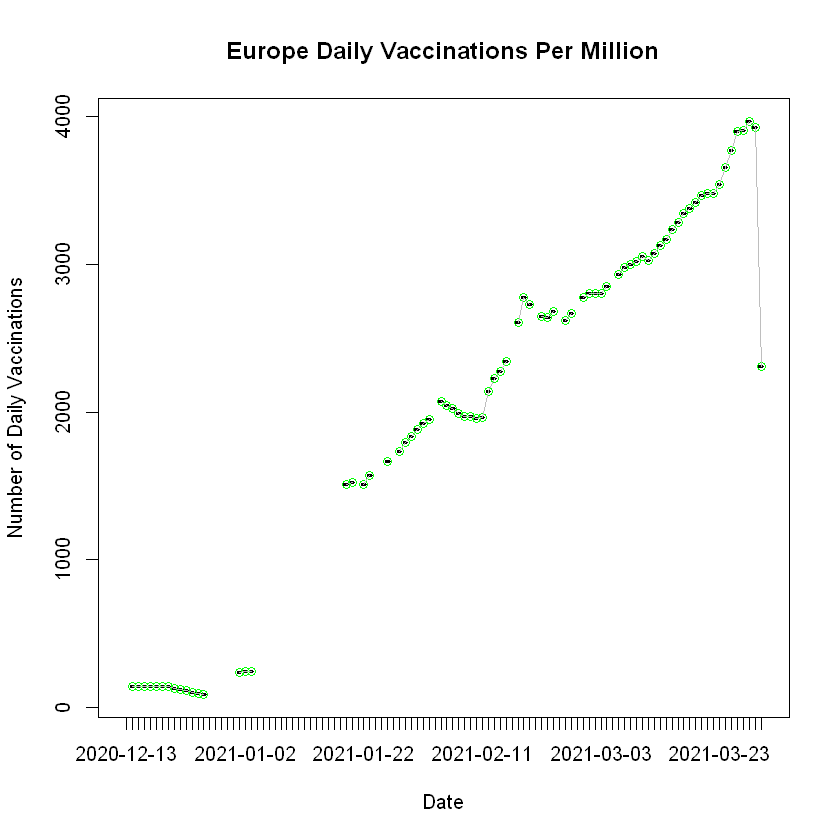

In [27]:
plot(daily_vacc_tot$date, daily_vacc_tot$vacc_permilli, main="Europe Daily Vaccinations Per Million", 
     xlab="Date", ylab="Number of Daily Vaccinations")

euro_vacc <- tibble4_2 %>% filter(location == "Europe")
uk_vacc <- europe_vacc %>% filter(location == "United Kingdom")

#points(uk_vacc$date, uk_vacc$daily_vaccinations_per_million, col=("blue"))
#points(euro_vacc$date, euro_vacc$daily_vaccinations_per_million, col=("pink"))

points(daily_vacc_tot$vacc_permilli, col=("green"))
lines(daily_vacc_tot$vacc_permilli, col=("gray"))


Warning message:
"Unknown or uninitialised column: 'daily_vaccinations_per_million'."

[1] 47

Warning message:
"Unknown or uninitialised column: 'daily_vaccinations_per_million'."

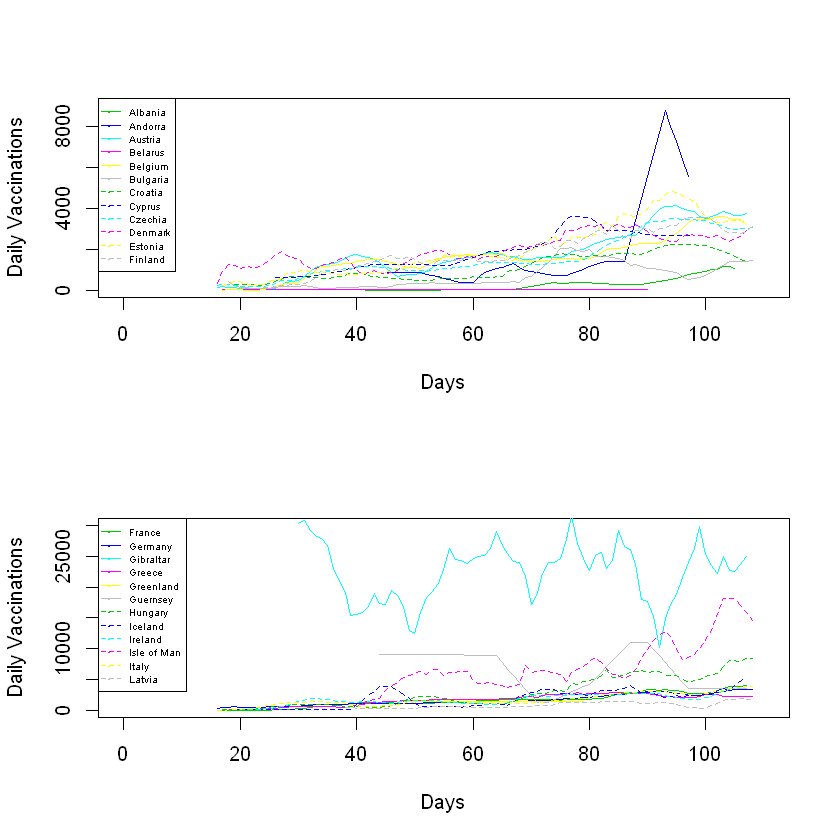

In [28]:
#in a for loop
par(mfrow=c(2,1))
plot(italy_vacc$daily_vaccinations_per_million, ylim=c(0,9000), xlim=c(0, 110), lty=1, type="l", col=("white"),
    ylab="Daily Vaccinations", xlab="Days")

for (x in seq_along(unique(europe_vacc$location)[0:12])){
    name = unique(europe_vacc$location)[x]
    tb <- filter(europe_vacc, location == name)
    lines(tb$date, tb$daily_vaccinations_per_million, 
          col=c(3:8,3:8)[x], 
          lty=c(rep(1,6),rep(2,6))[x]
, pch=("-"))
    }
legend("topleft", legend=unique(europe_vacc$location)[0:12], pch = "-", 
       col=c(3:8,3:8),lty=c(rep(1,6),rep(2,6)), cex=.5)

b <- unique(europe_vacc$location)
length(b) #need to do 4 plots

plot(italy_vacc$daily_vaccinations_per_million, ylim=c(0,30000), xlim=c(0, 110), lty=1, type="l", col=("white"),
     ylab="Daily Vaccinations", xlab="Days")

for (x in (13:24)){
    name = unique(europe_vacc$location)[x]
    tb <- filter(europe_vacc, location == name)
    lines(tb$date, tb$daily_vaccinations_per_million, 
          col=c(3:8,3:8)[x-12], 
          lty=c(rep(1,6),rep(2,6))[x-12], 
          pch=("-"))
    }
legend("topleft", legend=b[13:24], pch = "-", 
       col=c(3:8,3:8),lty=c(rep(1,6),rep(2,6)), cex=.5)

Warning message:
"Unknown or uninitialised column: 'daily_vaccinations_per_million'."

[1] 47

Warning message:
"Unknown or uninitialised column: 'daily_vaccinations_per_million'."

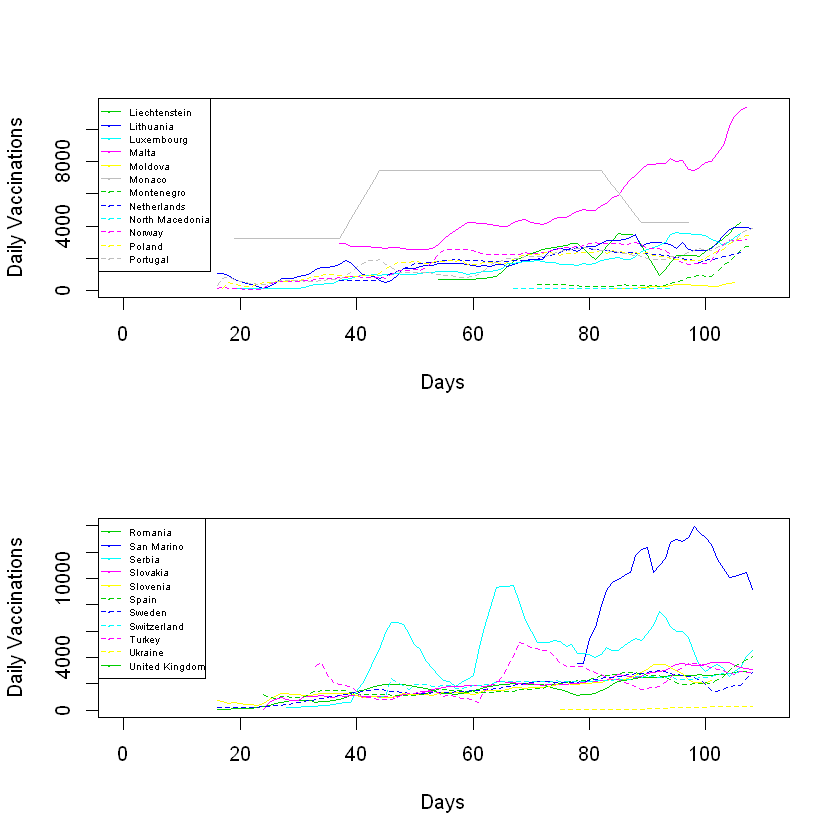

In [29]:
#in a for loop
par(mfrow=c(2,1))
plot(italy_vacc$daily_vaccinations_per_million, ylim=c(0,11500), xlim=c(0, 110), lty=1, type="l", col=("white"),
    ylab="Daily Vaccinations", xlab="Days")

for (x in (25:36)){
    name = unique(europe_vacc$location)[x]
    tb <- filter(europe_vacc, location == name)
    lines(tb$date, tb$daily_vaccinations_per_million, 
          col=c(3:8,3:8)[x-24], 
          lty=c(rep(1,6),rep(2,6))[x-24]
, pch=("-"))
    }
legend("topleft", legend=unique(europe_vacc$location)[25:36], pch = "-", 
       col=c(3:8,3:8),lty=c(rep(1,6),rep(2,6)), cex=.5)

b <- unique(europe_vacc$location)
length(b) #need to do 4 plots

plot(italy_vacc$daily_vaccinations_per_million, ylim=c(0,14000), xlim=c(0, 110), lty=1, type="l", col=("white"),
     ylab="Daily Vaccinations", xlab="Days")

for (x in (37:46)){
    name = unique(europe_vacc$location)[x]
    tb <- filter(europe_vacc, location == name)
    lines(tb$date, tb$daily_vaccinations_per_million, 
          col=c(3:7,3:7)[x-36], 
          lty=c(rep(1,5),rep(2,5))[x-36], 
          pch=("-"))
    }
legend("topleft", legend=b[37:47], pch = "-", 
       col=c(3:7,3:7),lty=c(rep(1,5),rep(2,5)), cex=.5)

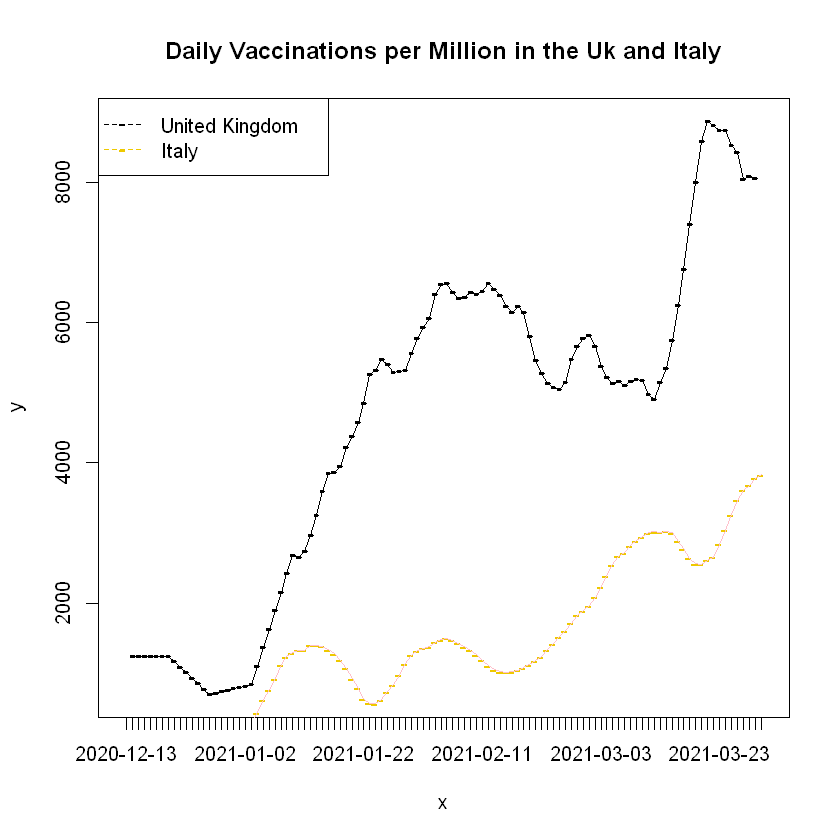

In [30]:
#interesting plots
#compare uk and italy 

italy_vacc <- europe_vacc %>% filter(location == "Italy")

plot(uk_vacc$date, uk_vacc$daily_vaccinations_per_million, main="Daily Vaccinations per Million in the Uk and Italy")
lines(uk_vacc$date, uk_vacc$daily_vaccinations_per_million)


points(italy_vacc$date, italy_vacc$daily_vaccinations_per_million, col="gold2", pch="-")
lines(italy_vacc$date, italy_vacc$daily_vaccinations_per_million, col="pink")


legend("topleft", legend=c('United Kingdom', 'Italy'),
       col=c("black","gold2"),lty=c(2,2), pch=c("-","-"))


In [31]:
#comparing different continents
afr_vacc <- tibble4_2 %>% filter(location == "Africa")
asia_vacc <- tibble4_2 %>% filter(location == "Asia")
sa_vacc <- tibble4_2 %>% filter(location == "South America")
na_vacc <- tibble4_2 %>% filter(location %in% c("United States","Canada"))

#have to combine US and Canada data together 
na_vacc <- na_vacc %>% group_by(date) 
na_comb <- summarise(na_vacc, tot = sum(people_vaccinated))
#population of Northern America is 370,535,722
na_comb$tot <- (na_comb$tot/370535722)*100 #for vacc per 100
#na_comb

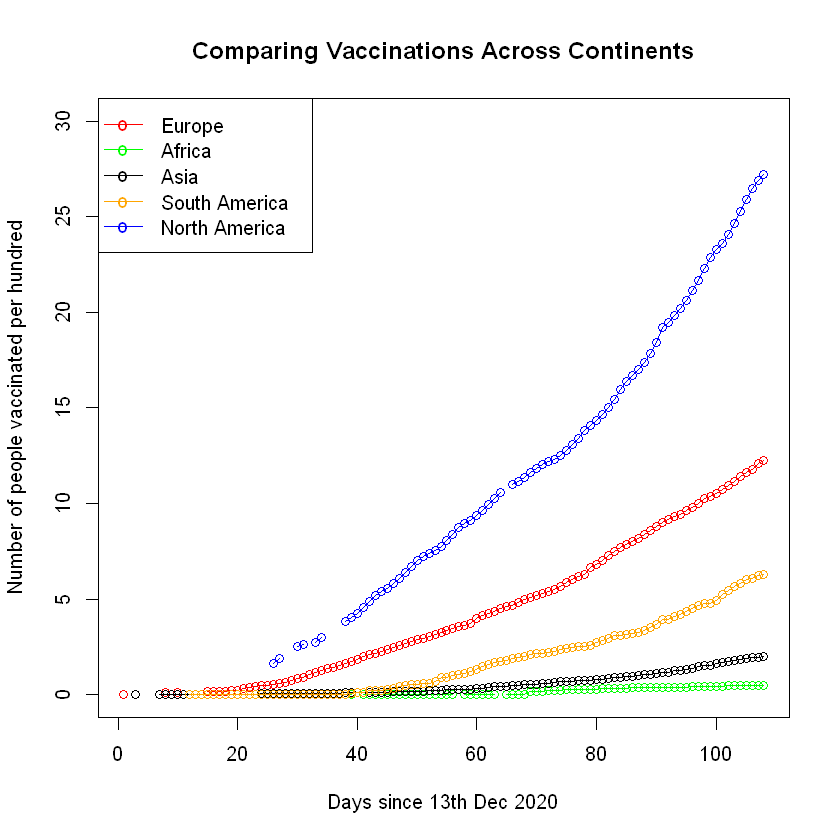

In [32]:
##### 

plot(euro_vacc$people_vaccinated_per_hundred, xlab = "Days since 13th Dec 2020", ylim=c(0,30), col = ("red"),
    ylab="Number of people vaccinated per hundred",
    main="Comparing Vaccinations Across Continents")
lines(euro_vacc$people_vaccinated_per_hundred, col=("red"))

points(afr_vacc$date, afr_vacc$people_vaccinated_per_hundred, col=("green"))
lines(afr_vacc$date, afr_vacc$people_vaccinated_per_hundred, col=("green"))

points(asia_vacc$date, asia_vacc$people_vaccinated_per_hundred, col=("black"))
lines(asia_vacc$date, asia_vacc$people_vaccinated_per_hundred, col=("black"))

points(sa_vacc$date, sa_vacc$people_vaccinated_per_hundred, col=("orange"))
lines(sa_vacc$date, sa_vacc$people_vaccinated_per_hundred, col=("orange"))

points(na_comb$date, na_comb$tot, col=("blue"))
lines(na_comb$date, na_comb$tot, col=("blue"))

legend("topleft", legend=c('Europe', 'Africa', 'Asia', 'South America', 'North America'),
       col=c("red","green","black","orange", "blue"), pch=c("o","o","o","o","o"), lty=c(1,1,1,1,1))